<a href="https://colab.research.google.com/github/pabloosoriodev/dmcmachinelearning/blob/main/Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descargar y limpiar Dataset**

In [12]:
# Cargar Data
import pandas as pd
data = pd.read_excel("DataMat.xlsx")
data.head()

,UN,EMPLID,INICIO,DESCRSHORT,FIN,EDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,SEX,MAR_STATUS,CAMPUS,Quit
0,CPE,100097042,1031,2021-1,1031,25,LIMA,LIMA,LURIGANCHO,F,S,ATE,1
1,CPE,100097098,1031,2021-1,1121,52,LIMA,LIMA,PUENTE PIEDRA,M,S,NORTE,1
2,CPE,100103455,1032,2021-2,1269,36,LIMA,LIMA,SAN MIGUEL,F,C,VILLA,0
3,CPE,100112976,1089,2022-1,1269,46,LIMA,LIMA,SAN JUAN DE LURIGANC,F,S,ARAMBURU,0
4,CPE,100113113,1089,2022-1,1269,33,LIMA,HUARAL,CHANCAY,M,C,ATE,0


In [13]:
data.shape

(25335, 13)

In [14]:
target = 'Quit'

In [15]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(6,3)})

In [17]:
# Configuración de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

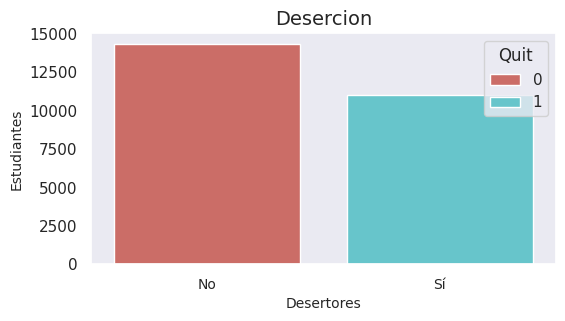

In [21]:
# Analizando el target
# Crea un countplot
ax = sns.countplot(x='Quit', data=data, hue='Quit', palette='hls')

# Personaliza el gráfico
ax.set_title('Desercion', fontsize=14)
ax.set_xlabel('Desertores', fontsize=10)
ax.set_ylabel('Estudiantes', fontsize=10)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Sí'], fontsize=10)
ax.yaxis.grid(False)

# Muestra el gráfico
plt.show()

**Analizando variables categóricas**


In [26]:
#Analisis por sexo
data.groupby(['SEX']).agg({"EMPLID":"count",
                              "EDAD" : "mean",
                              "Quit" : "mean"}).reset_index()

,SEX,EMPLID,EDAD,Quit
0,F,16736,22.781429,0.419754
1,M,8572,23.538381,0.461736
2,U,27,30.518519,0.814815


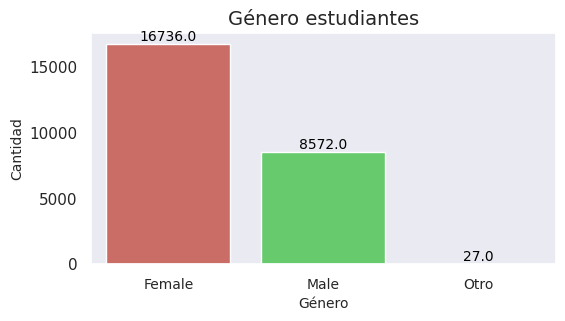

In [34]:
plt.figure(figsize=(6, 3))  # Tamaño

# Crea un countplot
ax = sns.countplot(x='SEX', hue='SEX', data=data, palette='hls')

# Personaliza el gráfico
ax.set_title('Género estudiantes', fontsize=14)
ax.set_xlabel('Género', fontsize=10)
ax.set_ylabel('Cantidad', fontsize=10)
ax.set_xticks(['M', 'F', 'U'])
ax.set_xticklabels(['Male', 'Female', 'Otro'], fontsize=10)
ax.yaxis.grid(False)

# Agrega etiquetas de valores
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Muestra el gráfico
plt.show()

In [37]:
res = data.groupby(['SEX']).agg({"EMPLID":"count",
                           "Quit" :"mean"}).reset_index()
res

,SEX,EMPLID,Quit
0,F,16736,0.419754
1,M,8572,0.461736
2,U,27,0.814815


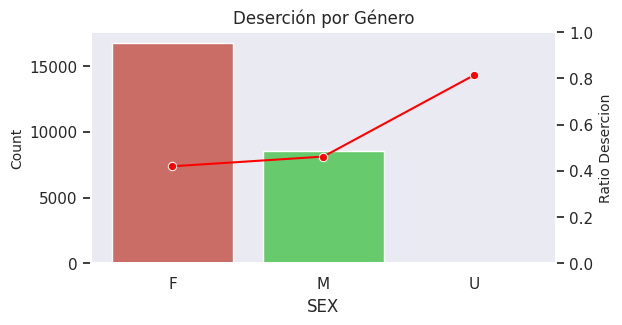

In [43]:
# Countplot
fig, ax1 = plt.subplots(figsize=(6, 3))
sns.countplot(x='SEX', data=data, hue='SEX', ax=ax1, palette='hls')

# Configurar el eje Y para contar PassengerId
ax1.set_ylabel('Count', fontsize=10)

# Crear un segundo eje para la línea
ax2 = ax1.twinx()

# Gráfico de línea para Survived
sns.lineplot(x='SEX', y='Quit', data=res, ax=ax2, color='red', marker='o', sort=False, errorbar=None)


ax2.set_ylabel('Ratio Desercion', fontsize=10)
ax2.set_ylim(0, 1)

# Añadir título
plt.title('Deserción por Género', fontsize=12)
ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

# Mostrar el gráfico
plt.show()

In [27]:
#Analisis por campus
data.groupby(['CAMPUS']).agg({"EMPLID":"count",
                              "EDAD" : "mean",
                              "Quit" : "mean"}).reset_index()

,CAMPUS,EMPLID,EDAD,Quit
0,ARAMBURU,136,34.485294,0.000000
1,ATE,2715,23.290608,0.556906
2,NORTE,5850,22.149402,0.422222
3,VILLA,16634,23.227546,0.422208


In [40]:
cam = data.groupby(['CAMPUS']).agg({"EMPLID":"count",
                           "Quit" :"mean"}).reset_index()
cam

,CAMPUS,EMPLID,Quit
0,ARAMBURU,136,0.000000
1,ATE,2715,0.556906
2,NORTE,5850,0.422222
3,VILLA,16634,0.422208


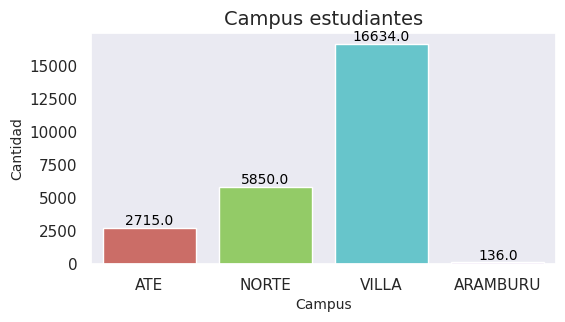

In [52]:
plt.figure(figsize=(6, 3))  # Tamaño

# Crea un countplot
ax = sns.countplot(x='CAMPUS', hue='CAMPUS', data=data, palette='hls')

# Personaliza el gráfico
ax.set_title('Campus estudiantes', fontsize=14)
ax.set_xlabel('Campus', fontsize=10)
ax.set_ylabel('Cantidad', fontsize=10)

ax.yaxis.grid(False)

# Agrega etiquetas de valores
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Muestra el gráfico
plt.show()

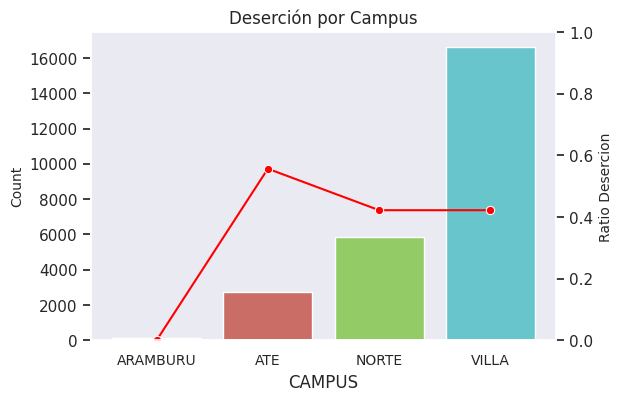

In [61]:
# Set the order of the categories
campus_order = sorted(data['CAMPUS'].unique())

# Countplot
fig, ax1 = plt.subplots(figsize=(6, 4))
sns.countplot(x='CAMPUS', hue='CAMPUS', data=data,  ax=ax1, palette='hls',order=campus_order)

# Configurar el eje Y para contar PassengerId
ax1.set_ylabel('Count', fontsize=10)

# Crear un segundo eje para la línea
ax2 = ax1.twinx()

# Gráfico de línea para Quit
sns.lineplot(x='CAMPUS', y='Quit', data=cam, ax=ax2, color='red', marker='o', sort=False, errorbar=None)
ax2.set_ylabel('Ratio Desercion', fontsize=10)
ax2.set_ylim(0, 1)

# Añadir título
plt.title('Deserción por Campus', fontsize=12)
ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

# Ajustar las etiquetas del eje x
ax1.set_xticks(range(len(campus_order)))
ax1.set_xticklabels(campus_order, fontsize=10)

# Mostrar el gráfico
plt.show()

**Analizando variables numéricas**

In [92]:
from math import isnan

# defino los cortes
def catedad(x):
  if isnan(x):
    return 'missing'
  elif x <= 18:
    return 'a. <=18'
  elif x < 20:
    return 'c. 19'
  elif x < 21:
    return 'd. 20'
  elif x < 22:
    return 'e. 21'
  elif x < 23:
    return 'f. 22'
  elif x < 24:
    return 'g. 23'
  elif x < 26:
    return 'h. 24-25'
  else:
    return 'i. >25'

In [93]:
# Aplicando categorizacion personalizada
temp = data.copy()
temp = temp.dropna()
temp['edad_cat'] = data.EDAD.apply(lambda x: catedad(x))

In [94]:
# Calculando la tasa de supervivencia por categoría de edad
survived_rate = temp.groupby('edad_cat').agg(
    PassengerId_count=('EMPLID', 'count'),
    Survived_rate=('Quit', 'mean')).reset_index()

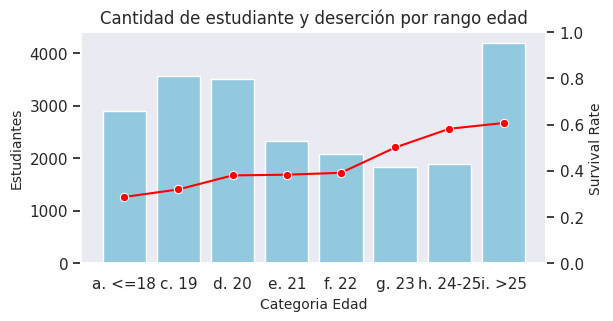

In [95]:
# Crear un gráfico de barras con dos ejes
fig, ax1 = plt.subplots(figsize=(6, 3))

# Barras para el conteo de PassengerId
sns.barplot(x='edad_cat', y='PassengerId_count', data=survived_rate, ax=ax1, color='skyblue')

# Configurar el eje Y para el conteo de PassengerId
ax1.set_ylabel('Estudiantes', fontsize=10)
ax1.set_xlabel('Categoria Edad', fontsize=10)

# Crear un segundo eje para la línea
ax2 = ax1.twinx()

# Gráfico de línea para la tasa de supervivencia
sns.lineplot(x='edad_cat', y='Survived_rate', data=survived_rate, ax=ax2, color='red', marker='o')

# Configurar el eje Y para la tasa de supervivencia
ax2.set_ylabel('Survival Rate', fontsize=10)
ax2.set_ylim(0, 1)

# Añadir título
plt.title('Cantidad de estudiante y deserción por rango edad', fontsize=12)
ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

# Mostrar el gráfico
plt.show()

In [96]:
temp.groupby(['edad_cat']).agg({"EMPLID":"count", "Quit" :"mean"}).reset_index()

,edad_cat,EMPLID,Quit
0,a. <=18,2903,0.286945
1,c. 19,3565,0.319495
2,d. 20,3505,0.380314
3,e. 21,2322,0.383290
4,f. 22,2069,0.391493
5,g. 23,1822,0.501098
6,h. 24-25,1884,0.582272
7,i. >25,4184,0.607075


**Discretización Quantile**

In [97]:
# Discretizar variable con kBinsDiscretizer

from sklearn.preprocessing import KBinsDiscretizer

data['Age_cat'] = KBinsDiscretizer(n_bins = 6, # Número de cortes o bins
                                   encode = 'ordinal', # Tipo de codificación que se le dará a la variable creada
                                   strategy = "quantile" # método de discretización
                                   ).fit_transform(data[['EDAD']].fillna(data[['EDAD']].mean()))

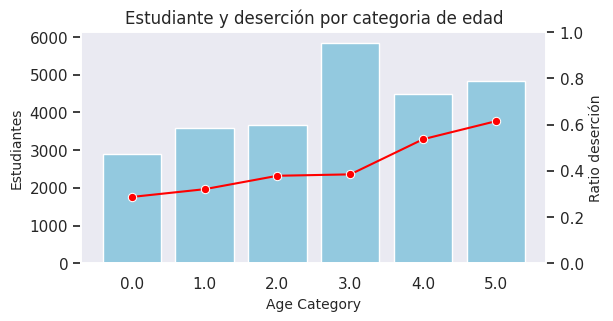

In [99]:
# Calculando la tasa de supervivencia por categoría de edad
survived_rate = data.groupby('Age_cat').agg(
    Estudiantes=('EMPLID', 'count'),
    Desertores=('Quit', 'mean')).reset_index()

# Crear un gráfico de barras con dos ejes
fig, ax1 = plt.subplots(figsize=(6, 3))

# Barras para el conteo de PassengerId
sns.barplot(x='Age_cat', y='Estudiantes', data=survived_rate, ax=ax1, color='skyblue')

# Configurar el eje Y para el conteo de PassengerId
ax1.set_ylabel('Estudiantes', fontsize=10)
ax1.set_xlabel('Age Category', fontsize=10)

# Crear un segundo eje para la línea
ax2 = ax1.twinx()

# Gráfico de línea para la tasa de supervivencia
sns.lineplot(x='Age_cat', y='Desertores', data=survived_rate, ax=ax2, color='red', marker='o')

# Configurar el eje Y para la tasa de supervivencia
ax2.set_ylabel('Ratio deserción', fontsize=10)
ax2.set_ylim(0, 1)

# Añadir título
plt.title('Estudiante y deserción por categoria de edad', fontsize=12)
ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

# Mostrar el gráfico
plt.show()

<Axes: xlabel='Age_cat', ylabel='Quit'>

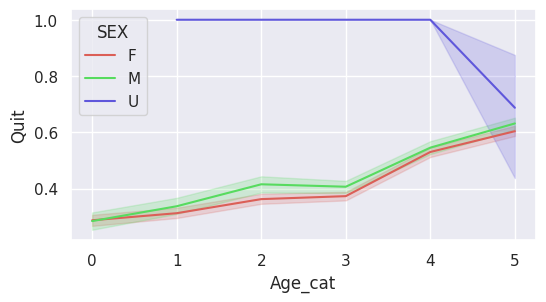

In [101]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Age_cat", y="Quit", palette = 'hls', hue = 'SEX')

**Muestreo Train/Test**

In [102]:
data.head()

,UN,EMPLID,INICIO,DESCRSHORT,FIN,EDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,SEX,MAR_STATUS,CAMPUS,Quit,Age_cat
0,CPE,100097042,1031,2021-1,1031,25,LIMA,LIMA,LURIGANCHO,F,S,ATE,1,4.0
1,CPE,100097098,1031,2021-1,1121,52,LIMA,LIMA,PUENTE PIEDRA,M,S,NORTE,1,5.0
2,CPE,100103455,1032,2021-2,1269,36,LIMA,LIMA,SAN MIGUEL,F,C,VILLA,0,5.0
3,CPE,100112976,1089,2022-1,1269,46,LIMA,LIMA,SAN JUAN DE LURIGANC,F,S,ARAMBURU,0,5.0
4,CPE,100113113,1089,2022-1,1269,33,LIMA,HUARAL,CHANCAY,M,C,ATE,0,5.0


In [103]:
# Muestreo de data
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data[['Quit', 'SEX']],
                               test_size = 0.3,
                               random_state = 123)

In [104]:
train.Quit.mean()

0.4343633697981279

In [105]:
test.Quit.mean()

0.43441652414156035

In [106]:
train.groupby('SEX').size()/len(train)

,0
SEX,
F,0.660595
M,0.338390
U,0.001015


In [107]:
test.groupby('SEX').size()/len(test)

,0
SEX,
F,0.660571
M,0.338245
U,0.001184


**Tratamiento de variables categoricas**

In [108]:
#Variables

numFeatures = ['EDAD']
catFeatures = ['UN','DEPARTAMENTO','PROVINCIA','DISTRITO','SEX','MAR_STATUS','CAMPUS']

In [109]:
data[catFeatures].head()

,UN,DEPARTAMENTO,PROVINCIA,DISTRITO,SEX,MAR_STATUS,CAMPUS
0,CPE,LIMA,LIMA,LURIGANCHO,F,S,ATE
1,CPE,LIMA,LIMA,PUENTE PIEDRA,M,S,NORTE
2,CPE,LIMA,LIMA,SAN MIGUEL,F,C,VILLA
3,CPE,LIMA,LIMA,SAN JUAN DE LURIGANC,F,S,ARAMBURU
4,CPE,LIMA,HUARAL,CHANCAY,M,C,ATE


**Encoding de variables categóricas**

In [110]:
# Rellenado de missings
data[catFeatures].fillna('missing', inplace = True)

<ipython-input-110-fef44b3a8860>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[catFeatures].fillna('missing', inplace = True)


In [111]:
data[catFeatures].drop_duplicates().head(20)

,UN,DEPARTAMENTO,PROVINCIA,DISTRITO,SEX,MAR_STATUS,CAMPUS
0,CPE,LIMA,LIMA,LURIGANCHO,F,S,ATE
1,CPE,LIMA,LIMA,PUENTE PIEDRA,M,S,NORTE
2,CPE,LIMA,LIMA,SAN MIGUEL,F,C,VILLA
3,CPE,LIMA,LIMA,SAN JUAN DE LURIGANC,F,S,ARAMBURU
4,CPE,LIMA,HUARAL,CHANCAY,M,C,ATE
5,CPE,LIMA,LIMA,LOS OLIVOS,F,C,NORTE
6,CPE,LIMA,LIMA,CHACLACAYO,F,S,ATE
7,PREGRADO,AREQUIPA,AREQUIPA,SOCABAYA,F,S,VILLA
8,PREGRADO,LIMA,LIMA,SAN MIGUEL,F,S,VILLA
9,PREGRADO,LIMA,LIMA,CHORRILLOS,F,S,VILLA


In [113]:
# Como se nos escapan algunos missings reemplazamos las filas NaN por una categoría específica para missings
import numpy as np
for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

data[catFeatures].drop_duplicates()

,UN,DEPARTAMENTO,PROVINCIA,DISTRITO,SEX,MAR_STATUS,CAMPUS
0,CPE,LIMA,LIMA,LURIGANCHO,F,S,ATE
1,CPE,LIMA,LIMA,PUENTE PIEDRA,M,S,NORTE
2,CPE,LIMA,LIMA,SAN MIGUEL,F,C,VILLA
3,CPE,LIMA,LIMA,SAN JUAN DE LURIGANC,F,S,ARAMBURU
4,CPE,LIMA,HUARAL,CHANCAY,M,C,ATE
...,...,...,...,...,...,...,...
25059,PREGRADO,HUANCAVELICA,ACOBAMBA,ACOBAMBA,M,S,VILLA
25215,PREGRADO,PIURA,PIURA,CASTILLA,M,S,NORTE
25290,PREGRADO,PIURA,SECHURA,SECHURA,M,S,NORTE
25292,CPE,LIMA,LIMA,SAN LUIS,F,C,ARAMBURU


**One Hot Encoding**

In [119]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore',sparse_output = True # Cambia el formato del output a dataframe o array
                              )

In [120]:
# Aplicamos one hot encoder
encoder.fit(train[catFeatures])

train[encoder.get_feature_names_out(catFeatures)] = encoder.transform(train[catFeatures]).toarray()
test[encoder.get_feature_names_out(catFeatures)] = encoder.transform(test[catFeatures]).toarray()

<ipython-input-120-e806953bba12>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[encoder.get_feature_names_out(catFeatures)] = encoder.transform(test[catFeatures]).toarray()
<ipython-input-120-e806953bba12>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[encoder.get_feature_names_out(catFeatures)] = encoder.transform(test[catFeatures]).toarray()
<ipython-input-120-e806953bba12>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

In [122]:
train.head()

,UN,EMPLID,INICIO,DESCRSHORT,FIN,EDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,SEX,...,SEX_M,SEX_U,MAR_STATUS_C,MAR_STATUS_D,MAR_STATUS_S,MAR_STATUS_V,CAMPUS_ARAMBURU,CAMPUS_ATE,CAMPUS_NORTE,CAMPUS_VILLA
21787,PREGRADO,100082531,2222,2021-1,2248,20,LIMA,LIMA,SAN LUIS,F,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3131,PREGRADO,100084497,2222,2021-1,2248,20,PROV. CONST. DEL CALLAO,PROV. CONST. DEL CALLAO,CALLAO,M,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4923,PREGRADO,100052721,2204,2020-1,2248,22,LIMA,LIMA,LIMA,F,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21948,CPE,100083636,1031,2021-1,1031,28,LIMA,LIMA,PUEBLO LIBRE (MAGDAL,M,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8688,PREGRADO,100051720,2196,2019-01,2248,21,LIMA,LIMA,SAN MIGUEL,F,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [123]:
train[['SEX', 'SEX_M', 'SEX_F']].head()

,SEX,SEX_M,SEX_F
21787,F,0.0,1.0
3131,M,1.0,0.0
4923,F,0.0,1.0
21948,M,1.0,0.0
8688,F,0.0,1.0


In [128]:
import pandas as pd
# Get feature names
train_feature_names = encoder.get_feature_names_out(catFeatures)

# Transform training and test sets
train_encoded = encoder.transform(train[catFeatures]).toarray()
test_encoded = encoder.transform(test[catFeatures]).toarray()

# Create DataFrames for the encoded features
train_encoded_df = pd.DataFrame(train_encoded, columns=train_feature_names, index=train.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=train_feature_names, index=test.index)

# Concatenate encoded features with original DataFrame
train = pd.concat([train, train_encoded_df], axis=1)
test = pd.concat([test, test_encoded_df], axis=1)

# Drop original categorical columns
train.drop(columns=catFeatures, inplace=True)
test.drop(columns=catFeatures, inplace=True)

**Logistic Regression**

In [133]:
#Variables para el modelo

# Define features and target variable
X_train = train.drop(columns=['Quit','EMPLID','INICIO','DESCRSHORT','FIN','Age_cat'])
y_train = train['Quit']
X_test = test.drop(columns=['Quit','EMPLID','INICIO','DESCRSHORT','FIN','Age_cat'])
y_test = test['Quit']

In [134]:
X_train.head()

,EDAD,UN_CPE,UN_PREGRADO,DEPARTAMENTO_AMAZONAS,DEPARTAMENTO_ANCASH,DEPARTAMENTO_APURIMAC,DEPARTAMENTO_AREQUIPA,DEPARTAMENTO_AYACUCHO,DEPARTAMENTO_CAJAMARCA,DEPARTAMENTO_CUSCO,...,SEX_M,SEX_U,MAR_STATUS_C,MAR_STATUS_D,MAR_STATUS_S,MAR_STATUS_V,CAMPUS_ARAMBURU,CAMPUS_ATE,CAMPUS_NORTE,CAMPUS_VILLA
21787,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3131,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4923,22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21948,28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8688,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6109722404946718

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.84      0.71      4299
           1       0.60      0.31      0.41      3302

    accuracy                           0.61      7601
   macro avg       0.61      0.58      0.56      7601
weighted avg       0.61      0.61      0.58      7601



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Arbol de desición**

In [137]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree model
decision_tree = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5974213919221155

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.75      0.68      4299
           1       0.55      0.39      0.46      3302

    accuracy                           0.60      7601
   macro avg       0.58      0.57      0.57      7601
weighted avg       0.59      0.60      0.58      7601

